* put a picture of Harry Max Markowitz for Part I



Assume that we have some amount of money to invest in $n$ different assets. 
We choose what fraction $w_i$ of our money to invest in each asset $i$, $i=1, \ldots, n$.

We call $w\in {\bf R}^n$ the *portfolio allocation vector* such that ${\mathbf 1}^T w =1$.
The allocation $w_i<0$ means a *short position* in asset $i$, or that we borrow shares to sell now that we must replace later.
The allocation $w \geq 0$ is a *long only* portfolio.
The quantity
$$ \|w \|_1 = {\mathbf 1}^T w_+ + {\mathbf 1}^T w_- $$
is known as *leverage*.

### CVX (optimization package) http://www.cvxpy.org/
* Install it
* Basic introduction.




In [1]:
!pip install -t ./packages/ cvxpy

  Using cached six-1.10.0-py2.py3-none-any.whl
  Using cached numpy-1.12.0-cp35-cp35m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 47.9MB 31kB/s 
Target directory /home/myan/CMSE202/packages/six.py already exists. Specify --upgrade to force replacement.
Target directory /home/myan/CMSE202/packages/six-1.10.0.dist-info already exists. Specify --upgrade to force replacement.
Target directory /home/myan/CMSE202/packages/__pycache__ already exists. Specify --upgrade to force replacement.
Target directory /home/myan/CMSE202/packages/fastcache already exists. Specify --upgrade to force replacement.
Target directory /home/myan/CMSE202/packages/fastcache-1.0.2.dist-info already exists. Specify --upgrade to force replacement.
Target directory /home/myan/CMSE202/packages/toolz already exists. Specify --upgrade to force replacement.
Target directory /home/myan/CMSE202/packages/tlz already exists. Specify --upgrade to force replacement.
Target directory /home/myan/CMSE202/pack

In [15]:
import sys
sys.path.append('./packages/')

In [59]:
# The following code is modified from http://www.cvxpy.org/en/latest/ ###
from cvxpy import *
import numpy as np

# Problem data.
m = 10
n = 5
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m,1)

# Construct the problem.
x = Variable(n,1)
objective = Minimize(sum_squares(A*x - b))
constraints = [0 <= x, x <= 1]
prob = Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
result = prob.solve()
# The optimal value for x is stored in x.value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status: optimal
optimal value 4.141338540902951
optimal var [[  2.81397541e-09]
 [  7.35293408e-09]
 [  1.34642316e-01]
 [  1.24973703e-01]
 [  4.83881224e-09]]


### Classical portfolio optimization
Assume that we have some amount of money to invest in $n$ different assets. 
We choose what fraction $w_i$ of our money to invest in each asset $i$, $i=1, \ldots, n$.
Classical portfolio optimization solves the optimization problem

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma w^T\Sigma w\\
\mbox{subject to} & {\bf 1}^T w = 1, \quad w_i\geq 0,
\end{array}

where $w \in {\bf R}^n$ is unknown variable to solve for and $\gamma >0$ is the *risk aversion parameter*.

The objective $\mu^Tw - \gamma w^T\Sigma w$ is the *risk-adjusted return*. Varying $\gamma$ gives the optimal *risk-return trade-off*. 
We can get the same risk-return trade-off by fixing return and minimizing risk.

### Classical (Markowitz) portfolio optimization
Assume that we have some amount of money to invest in $n$ different assets. 
We choose what fraction $w_i$ of our money to invest in each asset $i$, $i=1, \ldots, n$.
Classical (Markowitz) portfolio optimization solves the optimization problem

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma w^T\Sigma w\\
\mbox{subject to} & {\bf 1}^T w = 1, \quad w \in {\cal W},
\end{array}

where $w \in {\bf R}^n$ is the optimization variable, $\cal W$ is a set of allowed portfolios (e.g., ${\cal W} = {\bf R}_+^n$ for a long only portfolio), and $\gamma >0$ is the *risk aversion parameter*.

The objective $\mu^Tw - \gamma w^T\Sigma w$ is the *risk-adjusted return*. Varying $\gamma$ gives the optimal *risk-return trade-off*. 
We can get the same risk-return trade-off by fixing return and minimizing risk.

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(2017)

In [11]:
# Long only portfolio optimization.
from cvxpy import *
n_assets = 10
w     = Variable(n_assets)
gamma = Parameter(sign='positive')
mu    = np.abs(np.random.randn(n_assets, 1))
Sigma = np.random.randn(n_assets, n_assets)
Sigma = Sigma.T.dot(Sigma)
ret   = mu.T * w
risk  = quad_form(w, Sigma)
prob  = Problem(Maximize(ret - gamma*risk), 
               [sum_entries(w) == 1, 
                w >= 0])

In [12]:
# Compute trade-off curve.
SAMPLES     = 100
risk_data_o = np.zeros(SAMPLES)
ret_data_o  = np.zeros(SAMPLES)
gamma_vals  = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data_o[i] = sqrt(risk).value
    ret_data_o[i]  = ret.value

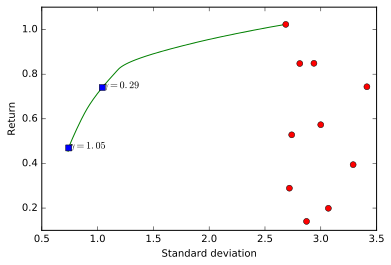

In [13]:
# Plot long only trade-off curve.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data_o, ret_data_o, 'g-')
for marker in markers_on:
    plt.plot(risk_data_o[marker], ret_data_o[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data_o[marker]+.008, ret_data_o[marker]-.003))
for i in range(n_assets):
    plt.plot(sqrt(Sigma[i,i]).value, mu[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

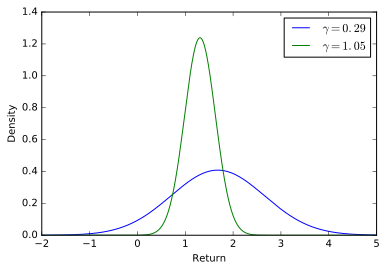

In [8]:
# Plot return distributions for two points on the trade-off curve.
import matplotlib.mlab as mlab
plt.figure()
for midx, idx in enumerate(markers_on):
    gamma.value = gamma_vals[idx]
    prob.solve()
    x = np.linspace(-2, 5, 1000)
    plt.plot(x, mlab.normpdf(x, ret.value, risk.value), label=r"$\gamma = %.2f$" % gamma.value)

plt.xlabel('Return')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

### Portfolio constraints

There are many other possible portfolio constraints besides the long only constraint. With no constraint (${\cal W} = {\bf R}^n$), the optimization problem has a simple analytical solution. We will look in detail at a *leverage limit*, or the constraint that $\|w \|_1 \leq L^\mathrm{max}$.


Another interesting constraint is the *market neutral* constraint $m^T \Sigma w =0$, where $m_i$ is the capitalization of asset $i$.
$M = m^Tr$ is the *market return*, and $m^T \Sigma w = {\bf cov}(M,R)$.
The market neutral constraint ensures that the portfolio return is uncorrelated with the market return.

### Example

In the following code we compute and plot optimal risk-return trade-off curves for leverage limits of 1, 2, and 4.
Notice that more leverage increases returns and allows greater risk.

In [15]:
# Portfolio optimization with leverage limit.
Lmax = Parameter()
prob = Problem(Maximize(ret - gamma*risk), 
               [sum_entries(w) == 1, 
                norm(w, 1) <= Lmax])

In [16]:
# Compute trade-off curve for each leverage limit.
L_vals = [1, 2, 4]
SAMPLES = 100
risk_data = np.zeros((len(L_vals), SAMPLES))
ret_data = np.zeros((len(L_vals), SAMPLES))
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
w_vals = []
for k, L_val in enumerate(L_vals):
    for i in range(SAMPLES):
        Lmax.value = L_val
        gamma.value = gamma_vals[i]
        prob.solve()
        risk_data[k, i] = sqrt(risk).value
        ret_data[k, i] = ret.value

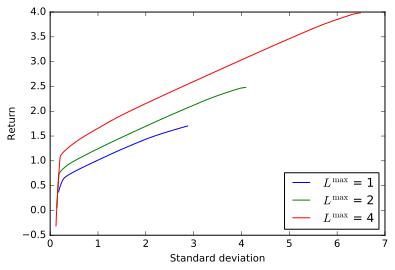

In [17]:
# Plot trade-off curves for each leverage limit.
for idx, L_val in enumerate(L_vals):
    plt.plot(risk_data[idx,:], ret_data[idx,:], label=r"$L^{\max}$ = %d" % L_val)
for w_val in w_vals:
    w.value = w_val
    plt.plot(sqrt(risk).value, ret.value, 'bs')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.legend(loc='lower right')
plt.show()

We next examine the points on each trade-off curve where $w^T\Sigma w = 2$.
We plot the amount of each asset held in each portfolio as bar graphs. (Negative holdings indicate a short position.)
Notice that some assets are held in a long position for the low leverage portfolio but in a short position in the higher leverage portfolios. 

In [18]:
# Portfolio optimization with a leverage limit and a bound on risk.
prob = Problem(Maximize(ret), 
              [sum_entries(w) == 1, 
               norm(w, 1) <= Lmax,
               risk <= 2])

In [19]:
# Compute solution for different leverage limits.
for k, L_val in enumerate(L_vals):
    Lmax.value = L_val
    prob.solve()
    w_vals.append( w.value )

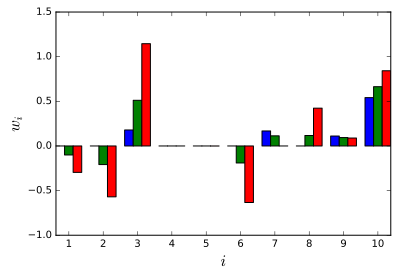

In [22]:
# Plot bar graph of holdings for different leverage limits.
colors = ['b', 'g', 'r']
indices = np.argsort(mu.flatten())
for idx, L_val in enumerate(L_vals):
     plt.bar(np.arange(1,n_assets+1) + 0.25*idx - 0.375, w_vals[idx][indices], color=colors[idx], 
             label=r"$L^{\max}$ = %d" % L_val, width = 0.25)
plt.ylabel(r"$w_i$", fontsize=16)
plt.xlabel(r"$i$", fontsize=16)
plt.xlim([1-0.375, 10+.375])
plt.xticks(np.arange(1,n_assets+1))
plt.show()

### Variations

There are many more variations of classical portfolio optimization. We might require that $\mu^T w \geq R^\mathrm{min}$ and minimize $w^T \Sigma w$ or $\|\Sigma ^{1/2} w\|_2$.
We could include the (broker) cost of short positions as the penalty $s^T (w)_-$ for some $s \geq 0$.
We could include transaction costs (from a previous portfolio $w^\mathrm{prev}$) as the penalty

$$
\kappa ^T |w-w^\mathrm{prev}|^\eta, \quad
\kappa \geq 0.
$$


Common values of $\eta$ are $\eta =1, ~ 3/2, ~2$.


### Factor covariance model

A particularly common and useful variation is to model the covariance matrix $\Sigma$ as a factor model

$$
\Sigma  =  F \tilde \Sigma F^T + D,
$$

where  $F \in {\bf R}^{n \times k}$, $k \ll n$ is the *factor loading matrix*. $k$ is the number of factors (or sectors) (typically 10s). $F_{ij}$ is the loading of asset $i$ to factor $j$.
$D$ is a diagonal matrix; $D_{ii}>0$ is the *idiosyncratic risk*. $\tilde \Sigma > 0$ is the *factor covariance matrix*.

$F^Tw \in {\bf R}^k$ gives the portfolio *factor exposures*. A portfolio is *factor $j$ neutral* if $(F^Tw)_j=0$.


### Portfolio optimization with factor covariance model

Using the factor covariance model, we frame the portfolio optimization problem as 

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma \left(f^T \tilde \Sigma f  + w^TDw \right) \\
\mbox{subject to} & {\bf 1}^T w = 1, \quad f=F^Tw\\
& w \in {\cal W}, \quad f \in {\cal F},
\end{array}

where the variables are the allocations $w \in {\bf R}^n$ and factor exposures $f\in {\bf R}^k$ and $\cal F$ gives the factor exposure constraints.

Using the factor covariance model in the optimization problem has a computational advantage. The solve time is $O(nk^2)$ versus $O(n^3)$ for the standard problem.

### Example

In the following code we generate and solve a portfolio optimization problem with 50 factors and 3000 assets.
We set the leverage limit $=2$ and $\gamma=0.1$.

We solve the problem both with the covariance given as a single matrix and as a factor model.
Using CVXPY with the ECOS solver running in a single thread, the solve time was 687.26 seconds for the single matrix formulation and 0.58 seconds for the factor model formulation.
We collected the timings on a MacBook Pro with an Intel Core i7 processor.

In [23]:
# Generate data for factor model.
n = 3000
m = 50
np.random.seed(1)
mu = np.abs(np.random.randn(n, 1))
Sigma_tilde = np.random.randn(m, m)
Sigma_tilde = Sigma_tilde.T.dot(Sigma_tilde)
D = np.diag(np.random.uniform(0, 0.9, size=n))
F = np.random.randn(n, m)

In [24]:
# Factor model portfolio optimization.
w = Variable(n)
f = F.T*w
gamma = Parameter(sign='positive')
Lmax = Parameter()
ret = mu.T*w 
risk = quad_form(f, Sigma_tilde) + quad_form(w, D)
prob_factor = Problem(Maximize(ret - gamma*risk), 
                     [sum_entries(w) == 1, 
                      norm(w, 1) <= Lmax])

# Solve the factor model problem.
Lmax.value = 2
gamma.value = 0.1
prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -5.696e-01  -7.586e+00  +1e+01  7e-03  5e-01  1e+00  5e-01    ---    ---    1  1  - |  -  - 
 1  -1.014e+00  -3.133e+00  +4e+00  2e-03  3e-01  3e-01  2e-01  0.7228  4e-02   1  1  1 |  0  0
 2  -3.730e-01  -2.225e+00  +3e+00  2e-03  4e-02  2e-01  1e-01  0.4101  6e-01   2  2  2 |  0  0
 3  -1.373e+00  -2.671e+00  +2e+00  1e-03  3e-02  1e-01  9e-02  0.8296  6e-01   1  2  2 |  0  0
 4  -1.561e+00  -1.881e+00  +5e-01  3e-04  8e-03  3e-02  2e-02  0.7689  2e-02   1  1  1 |  0  0
 5  -1.791e+00  -1.890e+00  +2e-01  7e-05  3e-03  9e-03  7e-03  0.7627  9e-02   1  1  1 |  0  0
 6  -1.825e+00  -1.890e+00  +1e-01  5e-05  2e-03  6e-03  5e-03  0.5724  4e-01   1  1  1 |  0  0
 7  -1.865e+00  -1.879e+00  +2e-02  9e-06  3e-04  1e-03  9e-04  0.9459  2e-01   2  1  1 |  0  0
 8  -1.880e+00  -1.880e+00  +1e-03  5e-07  2e-

1.8803101886434648

In [25]:
# Standard portfolio optimization with data from factor model.
risk = quad_form(w, F.dot(Sigma_tilde).dot(F.T) + D)
prob = Problem(Maximize(ret - gamma*risk), 
               [sum_entries(w) == 1, 
                norm(w, 1) <= Lmax])

# Uncomment to solve the problem.
# WARNING: this will take many minutes to run.
# prob.solve(verbose=True)